 %% [markdown]
 # Cournot and Stackelberg Games Simulation
 
 In this notebook we:
 
 1. Implement the two–player Cournot game.
 2. Implement the two–player Stackelberg game (with firm A as leader and firm B as follower).
 3. Compare the two models by plotting, as two lines, a market outcome (here we choose total output) as a function of a parameter (here we vary the demand intercept, α₍d₎).
 4. Provide extensions:
     - A general Cournot game with *n* players (with heterogeneous marginal cost parameters).
     - A Stackelberg game with one leader and *n* (symmetric) followers.

 
 ## Two–Player Models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Two-Player Cournot Game Function

In [ ]:
#cournot duopoly
def cournot_two_player(alpha_d, beta_d, beta1, beta2):
   
    q1 = (alpha_d + beta_d*(beta2 - 2*beta1)) / 3.

    q2 = (alpha_d + beta_d*(beta1 - 2*beta2)) / 3.

    Q  = q1 + q2

    p  = (alpha_d - Q) / beta_d
    pi1 = q1 * p - beta1 * q1

    pi2 = q2 * p - beta2 * q2
    return {'q1': q1, 'q2': q2, 'Q': Q, 'p': p, 'pi1': pi1, 'pi2': pi2}

#testung derivation
params_cournot = {'alpha_d': 100, 'beta_d': 0.5, 'beta1': 0.5, 'beta2': 0.1}
eq_cournot = cournot_two_player(**params_cournot)

#resulkt
print("Two-Player Cournot Equilibrium:")
for key, value in eq_cournot.items():
    print(f"  {key} = {value:.4f}")


Two-Player Cournot Equilibrium:
  q1 = 33.1833
  q2 = 33.3833
  Q = 66.5667
  p = 66.8667
  pi1 = 2202.2672
  pi2 = 2228.8939


## Two-Player Stackelberg Game Function

In [ ]:
def stackelberg_two_player(alpha_d, beta_d, beta1, beta2):
    
    q1 = (alpha_d + beta_d*beta2 - 2*beta_d*beta1) / 2.

    q2 = (alpha_d - q1 - beta_d*beta2) / 2.


    Q  = q1 + q2
    p  = (alpha_d - Q) / beta_d

    pi1 = q1 * p - beta1 * q1

    pi2 = q2 * p - beta2 * q2
    return {'q1': q1, 'q2': q2, 'Q': Q, 'p': p, 'pi1': pi1, 'pi2': pi2}

# Test with the same parameter values:
params_stackelberg = {'alpha_d': 100, 'beta_d': 0.5, 'beta1': 0.5, 'beta2': 0.1}
eq_stackelberg = stackelberg_two_player(**params_stackelberg)
#test
print("\nTwo-Player Stackelberg Equilibrium (Leader: Firm A):")
for key, value in eq_stackelberg.items():
    print(f"  {key} = {value:.4f}")



Two-Player Stackelberg Equilibrium (Leader: Firm A):
  q1 = 49.7750
  q2 = 25.0875
  Q = 74.8625
  p = 50.2750
  pi1 = 2477.5506
  pi2 = 1258.7653


## Comparison Plot for Two-Player Games

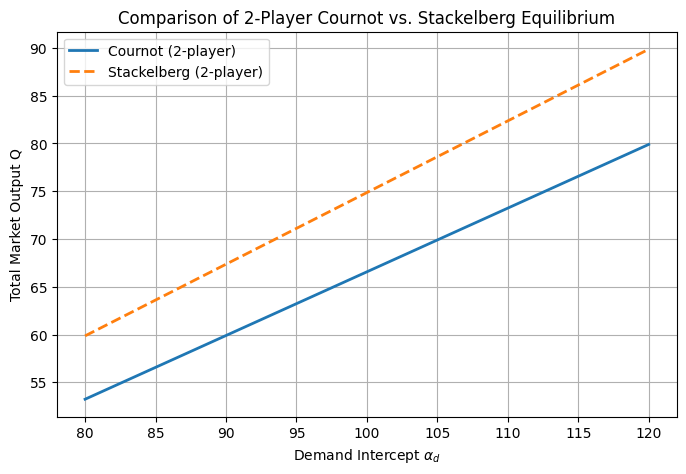

In [ ]:
#fix the values 
alpha_vals = np.linspace(80, 120, 100)


Q_cournot = np.zeros_like(alpha_vals)
Q_stackelberg = np.zeros_like(alpha_vals)

# fixed parameters:
beta_d = 0.5
beta1 = 0.5
beta2 = 0.1

for i, a in enumerate(alpha_vals):
    eq_c = cournot_two_player(a, beta_d, beta1, beta2)

    eq_s = stackelberg_two_player(a, beta_d, beta1, beta2)
    Q_cournot[i] = eq_c['Q']
    
    Q_stackelberg[i] = eq_s['Q']

plt.figure(figsize=(8,5))
plt.plot(alpha_vals, Q_cournot, label='Cournot (2-player)', lw=2)
plt.plot(alpha_vals, Q_stackelberg, label='Stackelberg (2-player)', lw=2, ls='--')
plt.xlabel(r'Demand Intercept $\alpha_d$')
plt.ylabel('Total Market Output Q')
plt.title('Comparison of 2-Player Cournot vs. Stackelberg Equilibrium')
plt.legend()
plt.grid(True)
plt.show()


 ## Extension 1: Cournot Game for *n* Players (Heterogeneous Costs)
 


In [ ]:
def cournot_n_players(alpha_d, beta_d, betas):

    n = len(betas)

    sum_betas = np.sum(betas)

    Q = (n * alpha_d - beta_d * sum_betas) / (n + 1)
    q = np.array([ (alpha_d + beta_d * sum_betas) / (n + 1) - beta_d * beta_i for beta_i in betas])
    p = (alpha_d - Q) / beta_d

    pi = q * p - np.array(betas) * q
    return {'q': q, 'Q': Q, 'p': p, 'pi': pi}

# test exampl n = 5 players wth heterogeneous costs
betas_n = [0.5, 0.4, 0.6, 0.3, 0.5]
eq_cournot_n = cournot_n_players(alpha_d=100, beta_d=0.5, betas=betas_n)
print("\nCournot Equilibrium for n-players (n=5):")
print("")
print("  Individual outputs q:", np.around(eq_cournot_n['q'], 4))
print("  Total output Q =", np.around(eq_cournot_n['Q'], 4))
print("  Market price p =", np.around(eq_cournot_n['p'], 4))
print("  Profits pi =", np.around(eq_cournot_n['pi'], 4))



Cournot Equilibrium for n-players (n=5):

  Individual outputs q: [16.6083 16.6583 16.5583 16.7083 16.6083]
  Total output Q = 83.1417
  Market price p = 33.7167
  Profits pi = [551.6735 555.0001 548.3568 558.3368 551.6735]


 ## Extension 2: Stackelberg Game with 1 Leader and *n* Followers (Symmetric Followers)
 
 As you can see in this extension we assume that there is one leader (firm 1) with marginal cost β₁ and 
 *n* followers who are symmetric (each with the same marginal cost βf).
follower produces:

